In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import IsolationForest


D:\anaconda\conda\envs\tf2\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [ ]:
from sklearn.svm import SVR
from sklearn.decomposition import PCA,KernelPCA
from sklearn.preprocessing import minmax_scale,normalize
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import seaborn as sns

### 1.产品的硫与辛烷值的关系

In [2]:
df = pd.read_csv('standard_x.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,340,341,342,343,344,345,346,347,348,y
0,-0.632876,0.947144,0.120983,-0.199970,0.236892,0.919775,-0.157333,-0.431309,-0.358556,0.142922,...,0.572285,-0.043221,0.359225,-0.240525,-0.152918,2.258640,-0.147557,1.883836,0.801798,89.22
1,-0.922285,0.841725,-0.082195,0.204297,-0.341366,0.967964,1.067938,-0.406248,-0.339765,-0.820644,...,0.567449,-0.003718,0.337789,-0.265386,-0.152649,2.234631,-0.258063,1.864957,0.801828,89.32
2,-0.800428,1.052562,-0.082195,0.186971,-0.295044,0.948688,0.671823,-0.376175,-0.372649,0.180269,...,0.653591,-0.044241,0.329220,-0.275263,-0.152726,2.223530,-0.280930,1.858360,0.801725,89.32
3,-1.074605,0.736307,-0.082195,0.143657,-0.179238,0.900499,-0.318465,-0.050381,-0.335068,-0.499455,...,0.654701,-0.021246,0.307428,-0.300141,-0.152432,2.196630,-0.301517,1.841807,0.801814,89.02
4,-0.861356,-0.107040,-0.094679,0.259161,-0.457172,0.900850,-0.311751,-0.366150,-0.696787,-0.611498,...,0.686585,-0.028981,0.298616,-0.309987,-0.151888,2.184474,-0.306728,1.835420,0.801912,88.32


In [5]:
x_s = np.array(df.iloc[:,3:])

In [3]:
df1 = pd.read_excel('E:/datas/ron.xlsx',sheet_name='Sheet2',)
y_ron = df1.iloc[:,0]
y_sul = df1.iloc[:,1]
X = df1.iloc[:,2:]
y = np.array(df1['y_ron'])

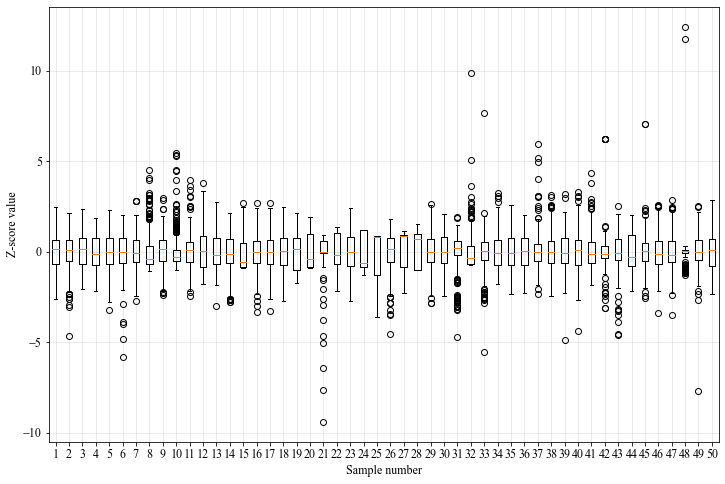

In [18]:
plt.figure(figsize=(12,8))
plt.rcParams['font.family'] = 'Times New Roman' # 设置字体样式
plt.rcParams['font.size'] = '12' # 设置字体大小 
plt.boxplot(df.iloc[:,:50])
plt.xlabel('Sample number')
plt.ylabel('Z-score value')

plt.grid(alpha=0.3)
plt.savefig('outlier.jpeg',dpi=600,bbox_inches='tight')
plt.show()

In [15]:
plt.boxplot?

In [17]:
plt.savefig?

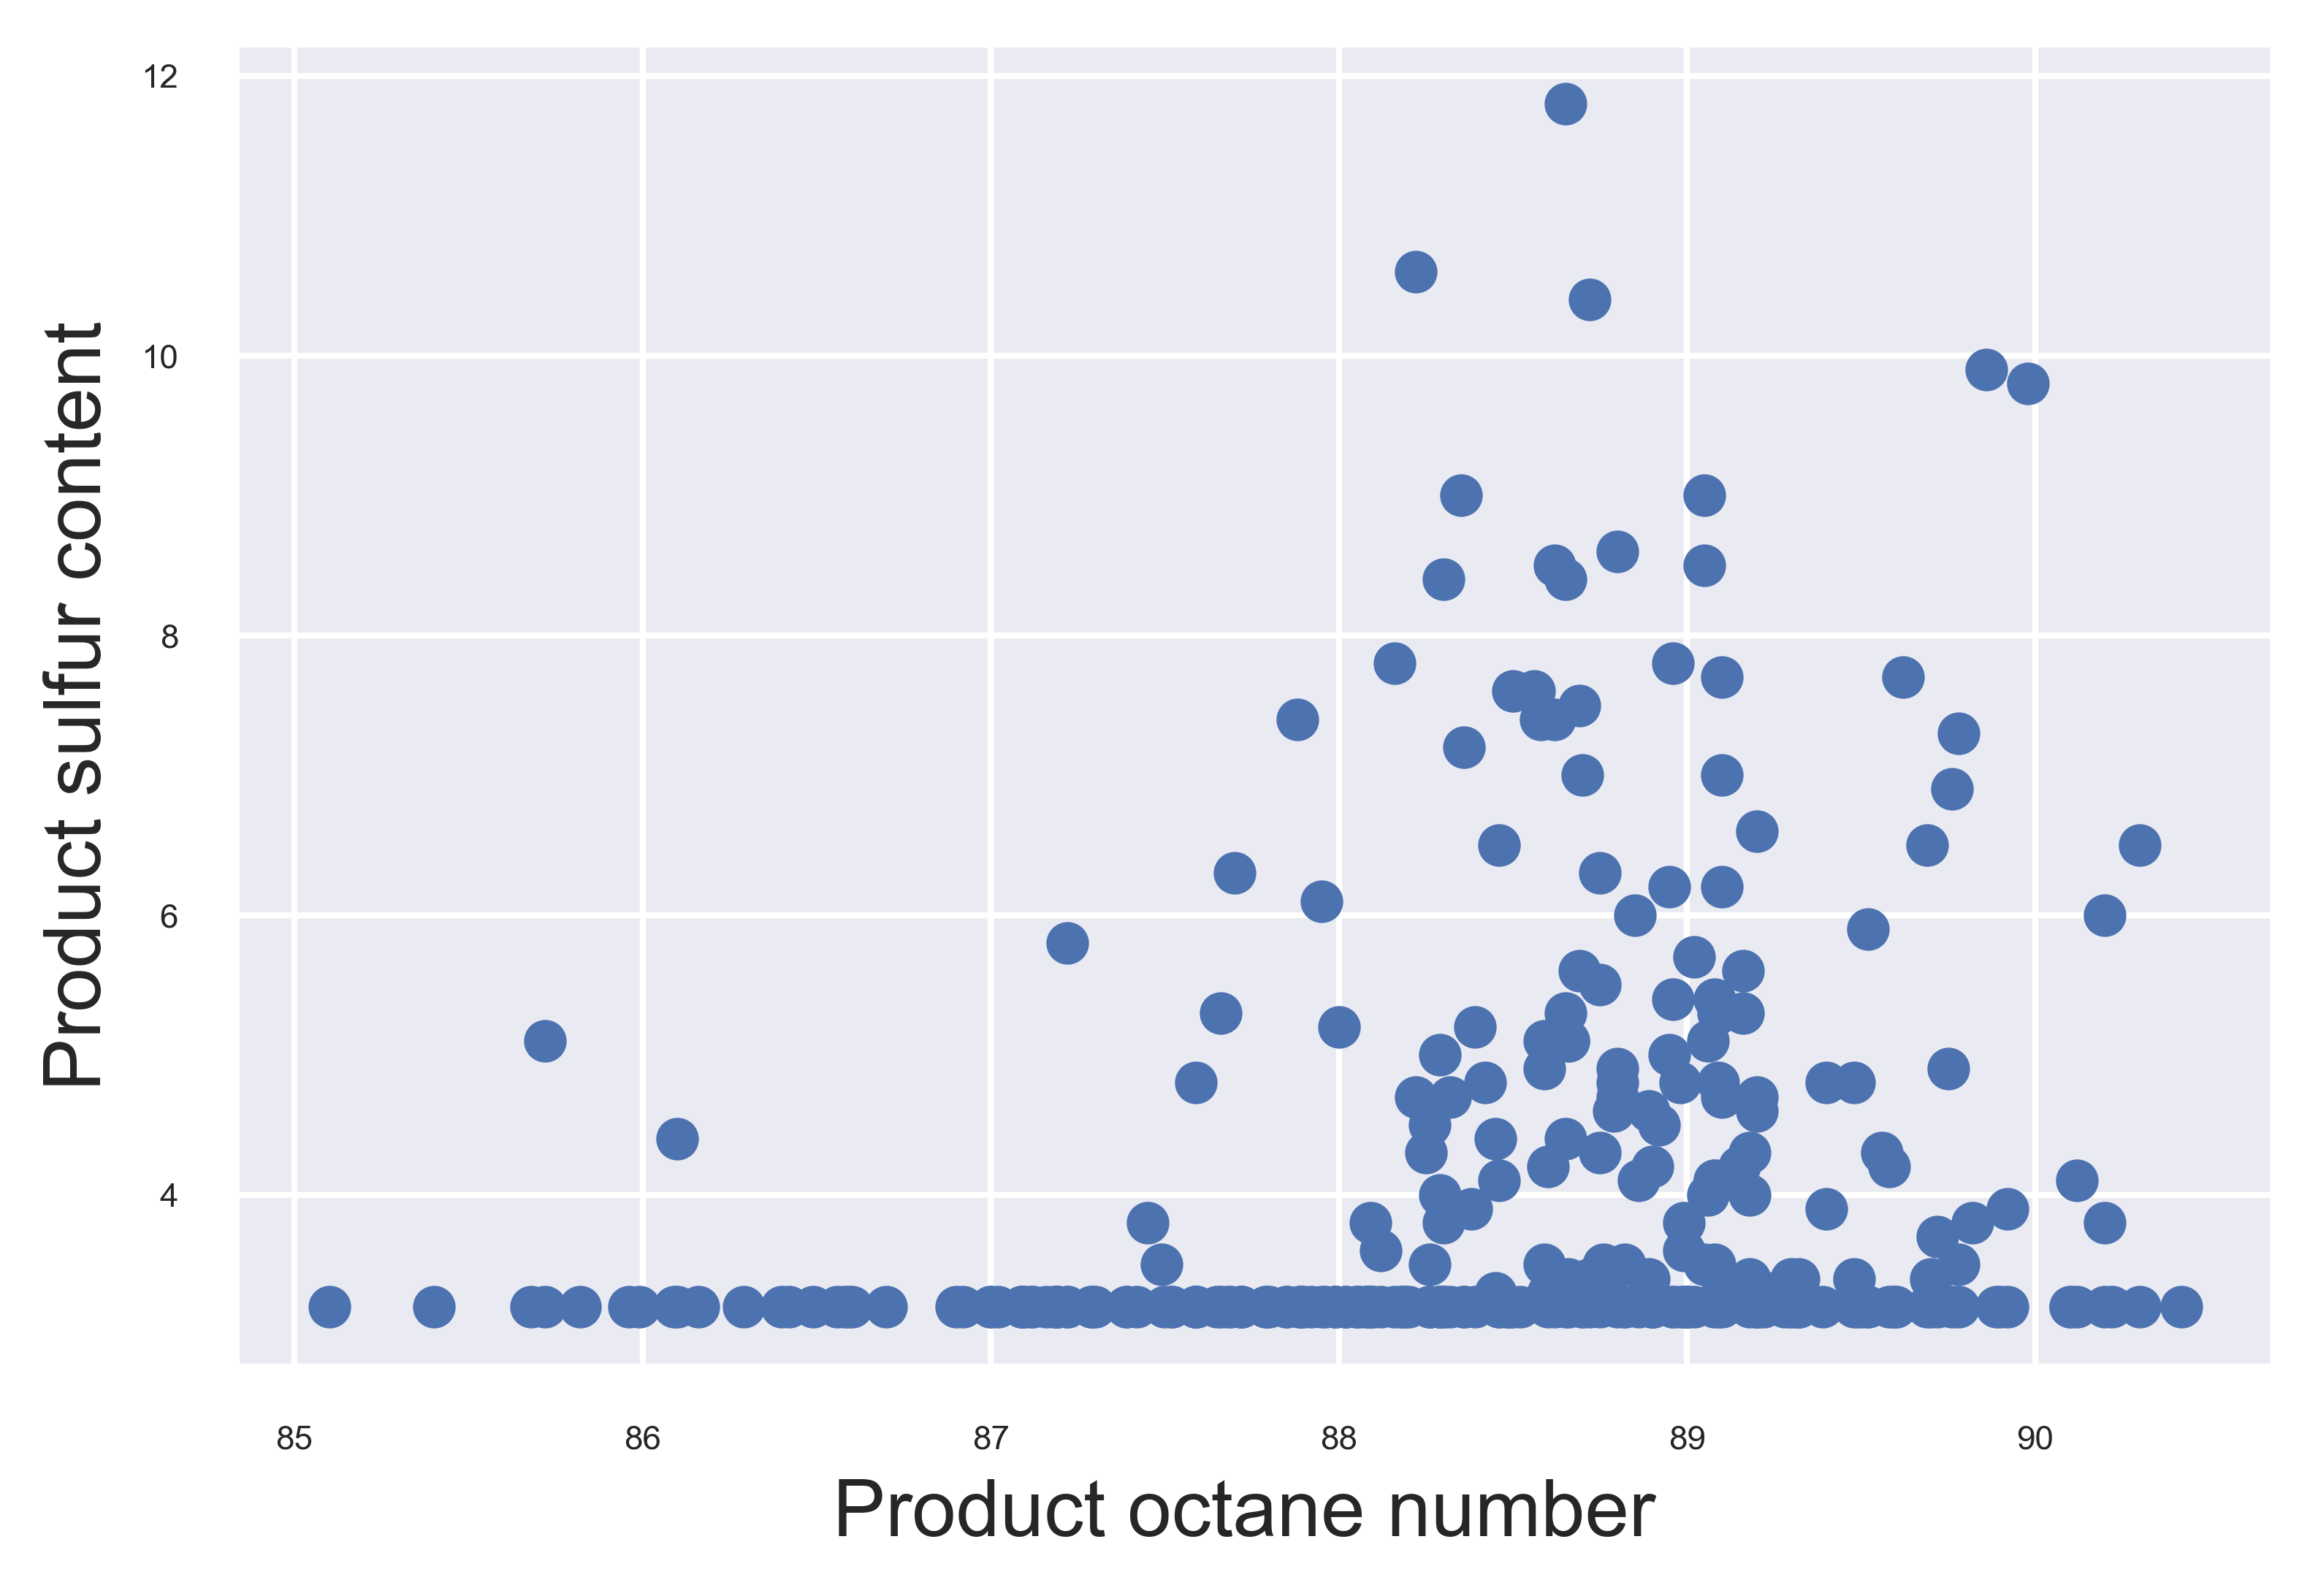

In [27]:
fig = plt.figure(dpi=600)
plt.rcParams['font.sans-serif'] = 'Times New Roman'
# color = sns.color_palette()
# sns.set_style('darkgrid')
sns.set_style('darkgrid')
ax = fig.add_subplot()
# fig, ax = plt.subplots()
ax.scatter(y_ron, y_sul)# 绘制散点图
plt.ylabel('Product sulfur content', fontsize=13)
plt.xlabel('Product octane number ', fontsize=13)
plt.savefig('product sulfur and octane.jpeg',bbox_inches='tight')
plt.show()

* 产品辛烷值在(85,95)，硫含量在(3.5,12);
* 图像类似于一个正态分布；
* 可以发现产品辛烷值在88以下，90以上时，硫含量比较低；

### 2.原料硫含量与辛烷值的关系

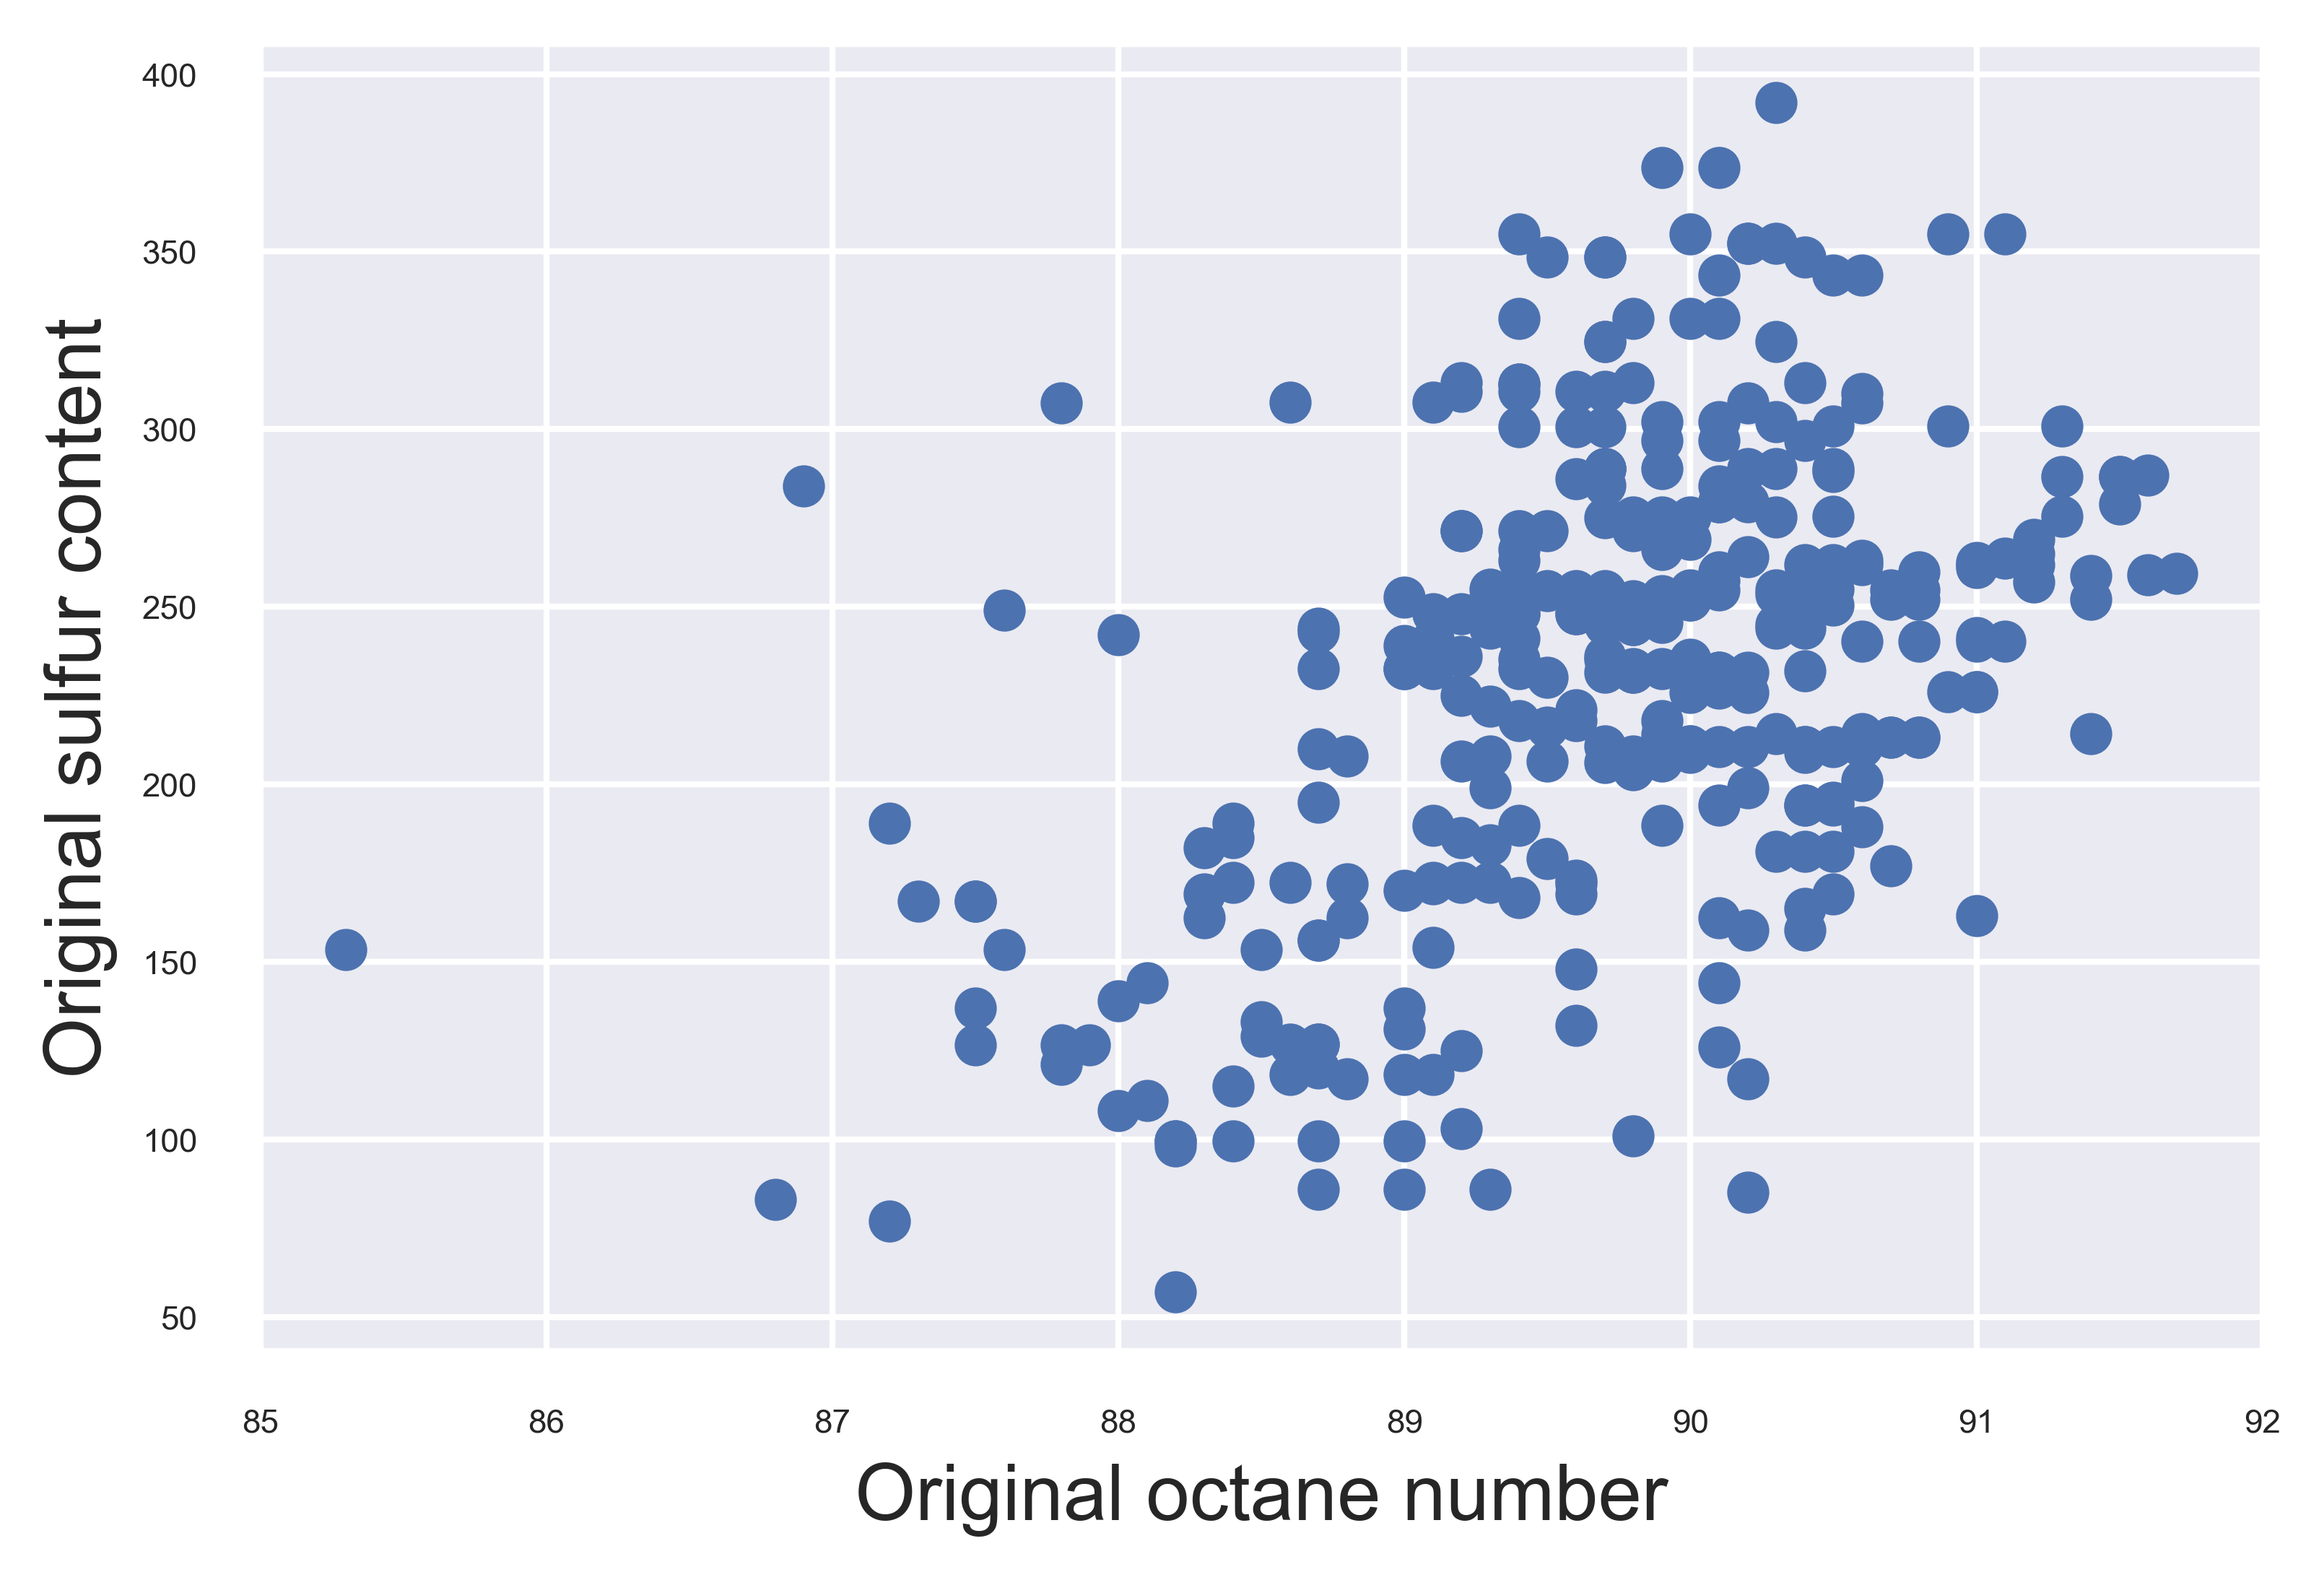

In [26]:
fig = plt.figure(dpi=600)
plt.rcParams['font.sans-serif'] = 'Times New Roman'
# color = sns.color_palette()
sns.set_style('darkgrid')
ax = fig.add_subplot()
ax.scatter(X.iloc[:,1], X.iloc[:,0])# 绘制散点图
plt.ylabel('Original sulfur content', fontsize=13)
plt.xlabel('Original octane number', fontsize=13)

plt.savefig('sulfur and octane.jpeg',bbox_inches='tight')
plt.show()

* 可以看到原料辛烷值与硫含量有一定正相关关系，随着辛烷值增加，原料硫含量也会提高

In [ ]:
### 3.计算相关矩阵并绘制热力图

In [19]:
df2 = df1.copy()

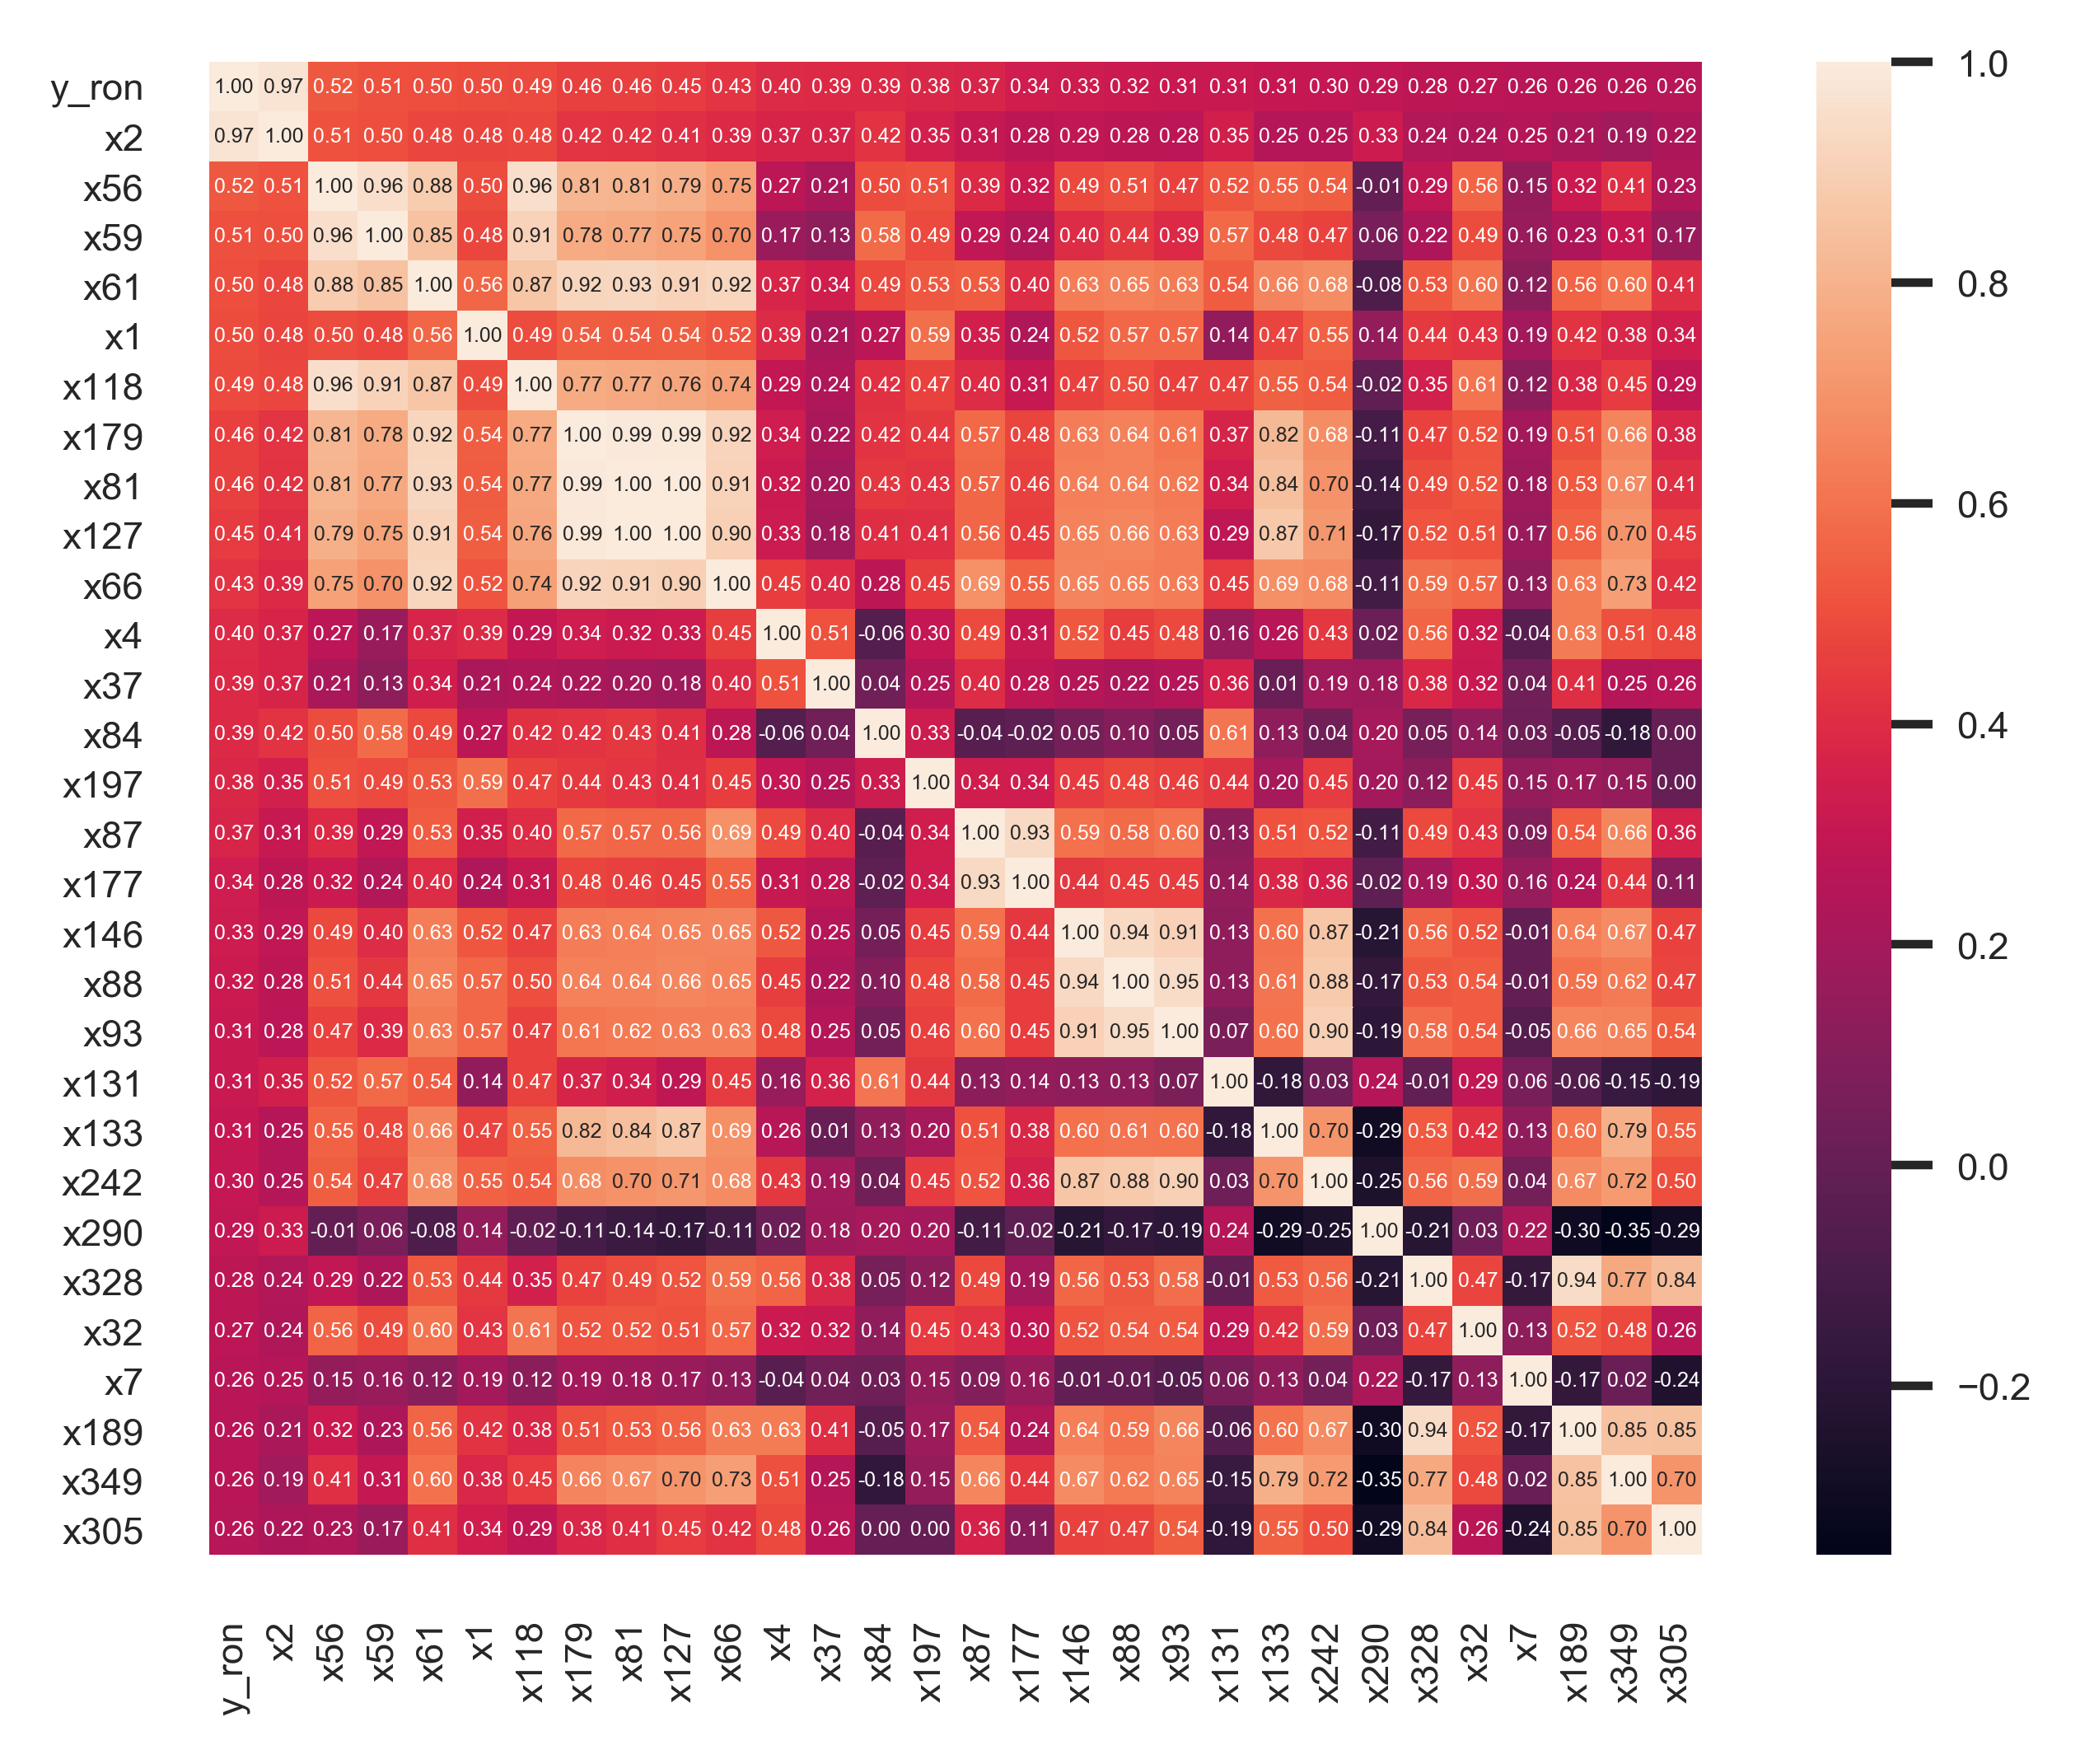

In [22]:
k = 30
corrmat = df2.corr()  # 获得相关性矩阵
# 获得相关性最高的 K 个特征
cols = corrmat.nlargest(k, 'y_ron')['y_ron'].index
# 获得相关性最高的 K 个特征组成的子数据集
cm = np.corrcoef(df2[cols].values.T)
# 绘制热图
fig = plt.figure(dpi=600)
plt.rcParams['font.sans-serif'] = 'Times New Roman'
sns.set(font_scale=0.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={
                 'size': 3}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [64]:
print(cols)

Index(['y_ron', 'x2', 'x56', 'x59', 'x61', 'x1', 'x118', 'x179', 'x81', 'x127',
       'x66', 'x4', 'x37', 'x84', 'x197', 'x87', 'x177', 'x146', 'x88', 'x93',
       'x131', 'x133', 'x242', 'x290', 'x328', 'x32', 'x7', 'x189', 'x349',
       'x305'],
      dtype='object')


In [65]:
# 相关性排序
pd.DataFrame(cm[0])

,0
0,1.000000
1,0.973372
2,0.524959
3,0.505003
4,0.502304
5,0.495207
6,0.492235
7,0.457438
8,0.457295
9,0.447140


* 与产品辛烷值相关性较高的,相关系数大于0.3的有30个。
* 分别为原料辛烷值； 催化汽油进装置总流量； 3#催化汽油进装置流量；原料进装置温度；原料硫含量；产品汽油出装置流量；C-201下部进料管温度；
    D104温度；E-101壳程出口总管温度；原料换热器管程总管进口温度；烯烃,v%；轻烃出装置流量；D121去稳定塔流量；原料汽油硫含量；还原器温度；
    D-102温度；D-123蒸汽出口流量；再生风流量；再生器顶烟气温度；E-101D壳程出口管温度；E-101A壳程出口管温度；R-102 #3通风挡板温度；K-101A左排气温度；S_ZORB AT-0006；精制汽油出装置流量；密度(kg/m³)；D-110顶压力;E-101DEF壳程出口温度；EH-103入口流量

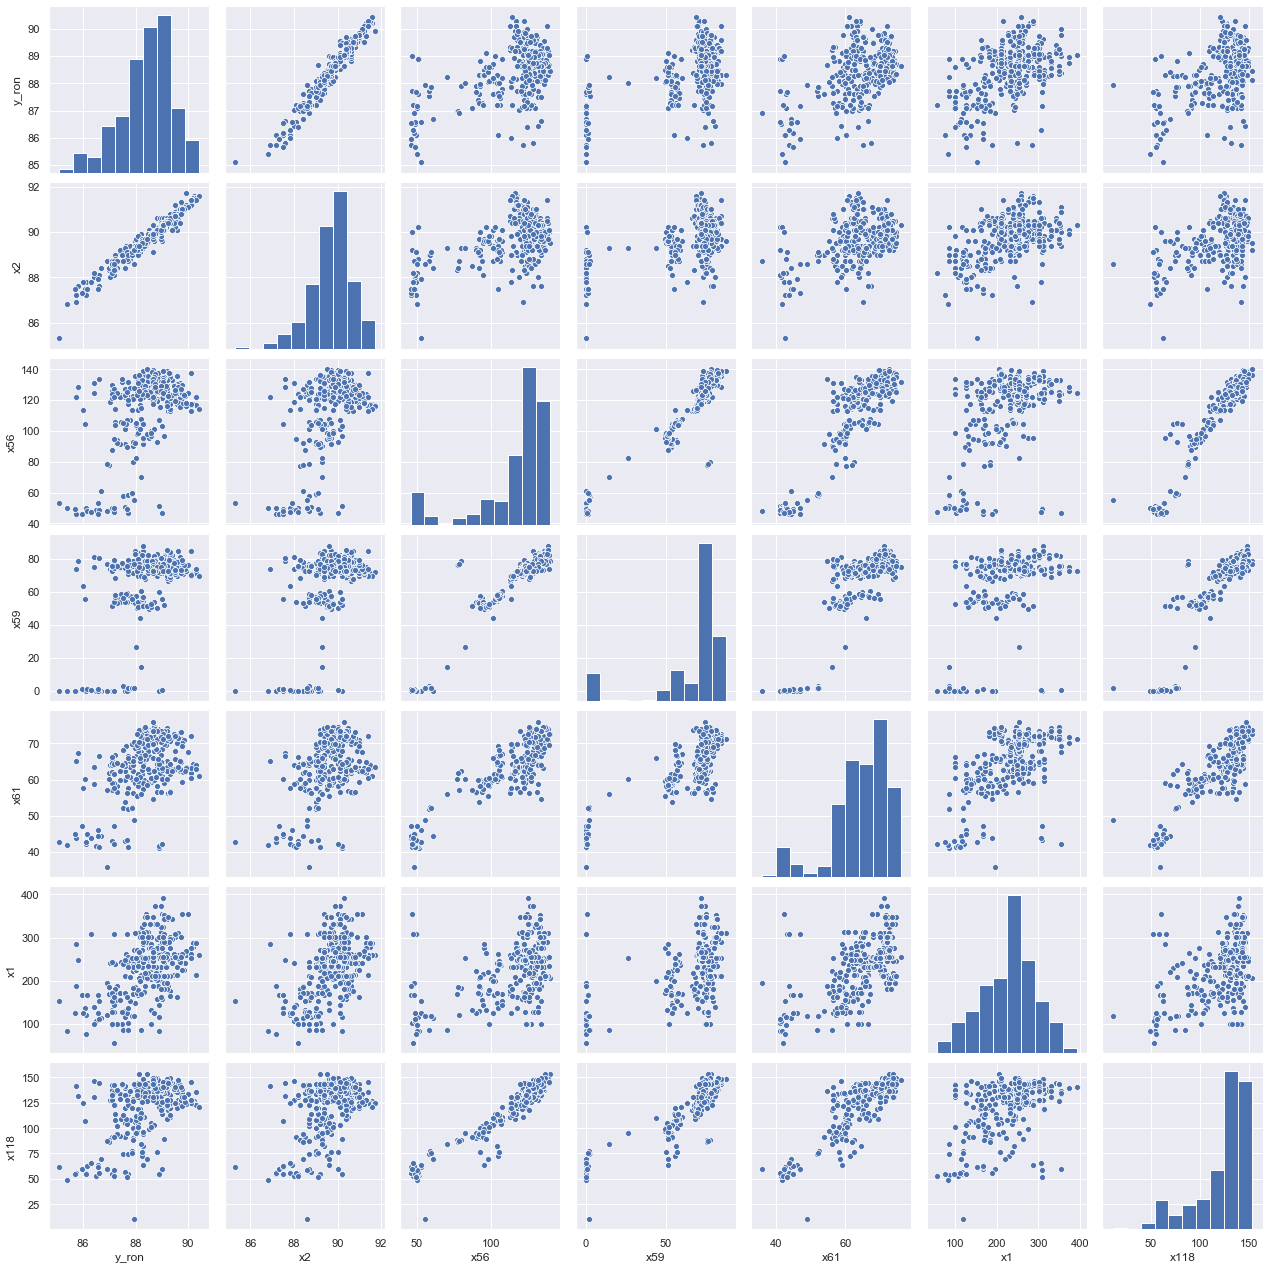

In [67]:
# 绘制散点图
sns.set()
cols = ['y_ron', 'x2', 'x56',
        'x59', 'x61', 'x1', 'x118']
sns.pairplot(df2[cols], size=2.5)
plt.show()

### 3. 数据预处理

#### 3.1查看产品辛烷值数字特征及分布

In [68]:
# 产品辛烷值的数字特征
df2['y_ron'].describe()

count    325.000000
mean      88.446769
std        0.984739
min       85.100000
25%       87.900000
50%       88.600000
75%       89.100000
max       90.420000
Name: y_ron, dtype: float64


 mu = 88.45 and sigma = 0.98



Text(0.5, 1.0, 'Octane number distribution')

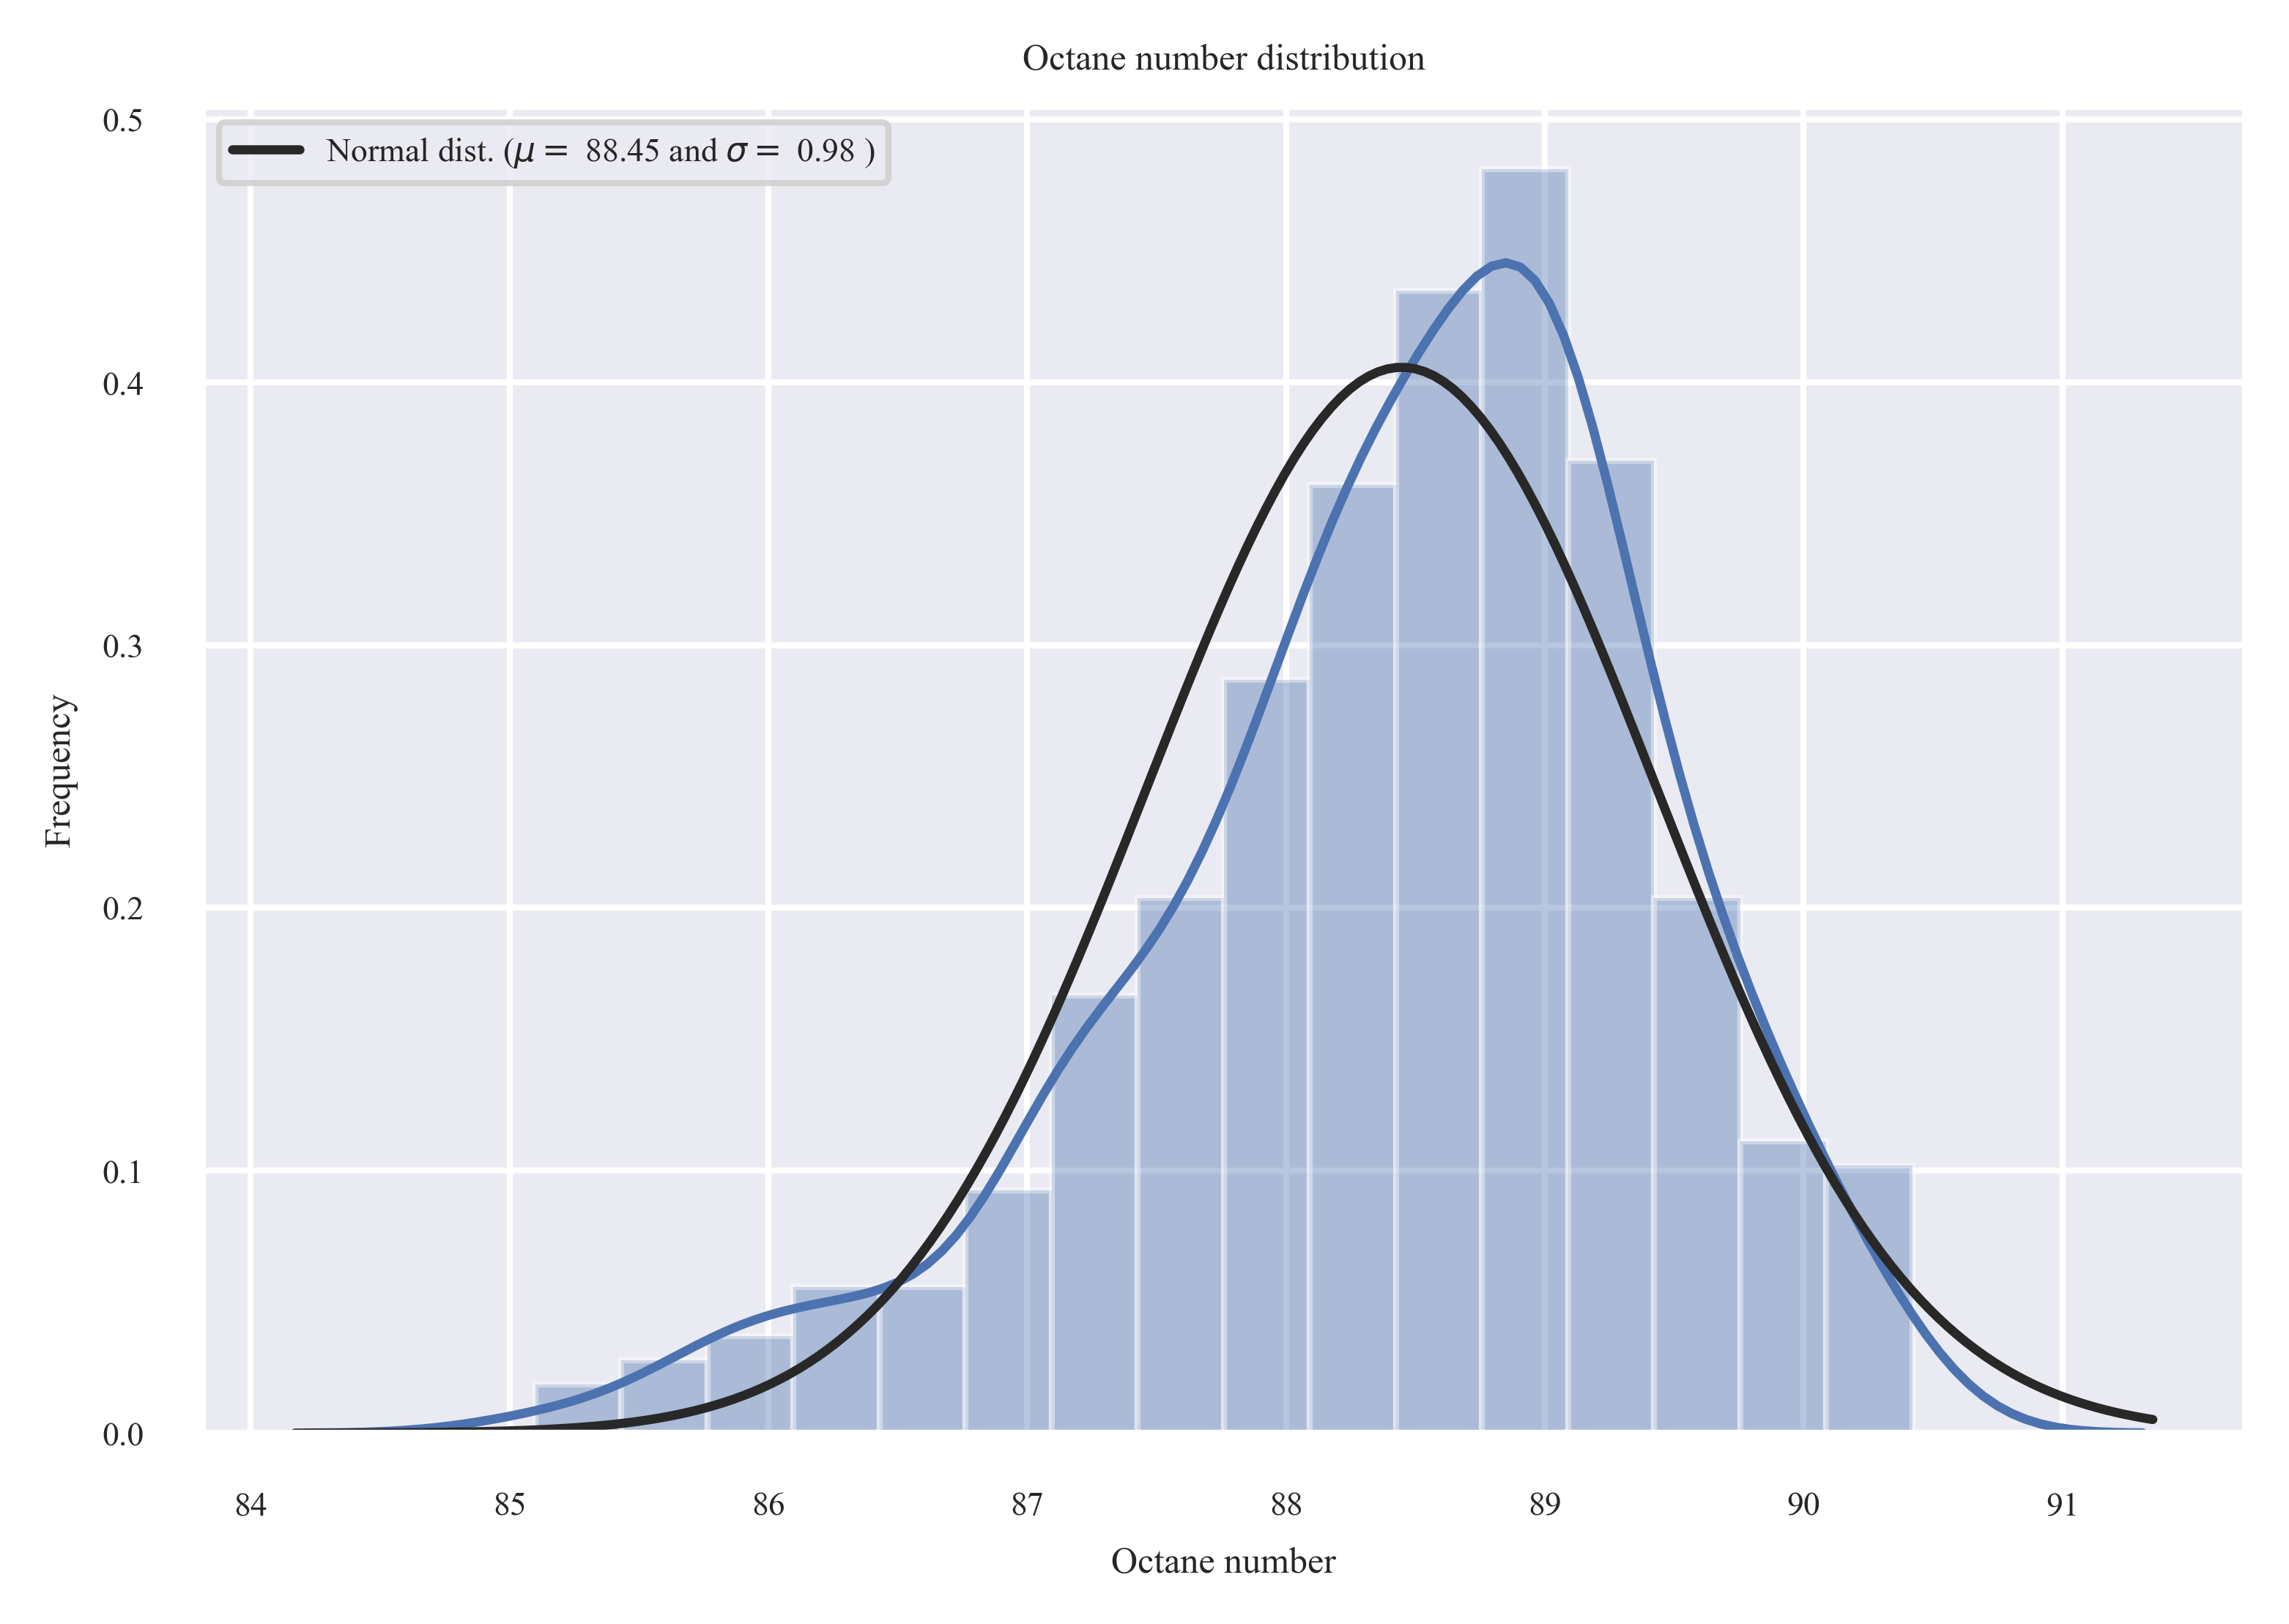

In [25]:
# 产品辛烷值分布特征
from scipy.stats import norm, skew
fig = plt.figure(dpi=600)
plt.rcParams['font.sans-serif'] = 'Times New Roman'
sns.distplot(df2['y_ron'], fit=norm)

# 获得均值和方差
(mu, sigma) = norm.fit(df2['y_ron'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# 画出数据分布图
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
           loc='best')
plt.ylabel('Frequency')
plt.xlabel("Octane number")

# 设置标题
plt.title('Octane number distribution')

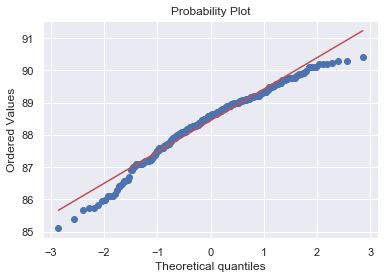

In [70]:
# 产品辛烷值Q-Q图
from scipy import stats

fig = plt.figure()
res = stats.probplot(df2['y_ron'], plot=plt)
plt.show()

#### 3.2 查看缺失值并进行可视化

In [72]:
df2.isnull().sum().sort_values(ascending=False)[:20]  # 取前 20 个数据

x365    0
x113    0
x115    0
x116    0
x117    0
x118    0
x119    0
x120    0
x121    0
x122    0
x123    0
x124    0
x125    0
x126    0
x127    0
x128    0
x129    0
x130    0
x131    0
x132    0
dtype: int64

* 查看没有缺失值，而实际中缺失值被0代替
* 需要将0替换为null

In [20]:
# 将指定值替换
df3 = df2.replace([0.0],[np.nan])

In [30]:
# 统计表格中出现缺失值的列数，即有多少个特征中存在缺失值
df3.isnull().any().value_counts()

False    335
True      32
dtype: int64

In [21]:
df3.isnull().sum().sort_values(ascending=False)[:32]  # 取前 20 个数据

#求缺失率
df3_null_rate = (df3.isnull().sum() / len(df3)) * 100
df3_null_rate = df3_null_rate.drop(df3_null_rate[df3_null_rate == 0.000000].index).sort_values(ascending=False)[:32]
missing_data = pd.DataFrame({'Missing Ratio': df3_null_rate})
missing_data.head(32)


,Missing Ratio
x227,94.769231
x216,94.461538
x219,91.384615
x36,88.615385
x85,67.384615
x89,65.846154
x310,65.846154
x100,57.538462
x24,44.615385
x57,42.153846


In [32]:
missing_data.index

Index(['x227', 'x216', 'x219', 'x36', 'x85', 'x89', 'x310', 'x100', 'x24',
       'x57', 'x162', 'x343', 'x39', 'x37', 'x107', 'x121', 'x358', 'x234',
       'x357', 'x208', 'x59', 'x359', 'x174', 'x58', 'x35', 'x146', 'x175',
       'x362', 'x295', 'x173', 'x364', 'x50'],
      dtype='object')

In [33]:
missing_data.shape

(32, 1)

In [30]:
print (plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


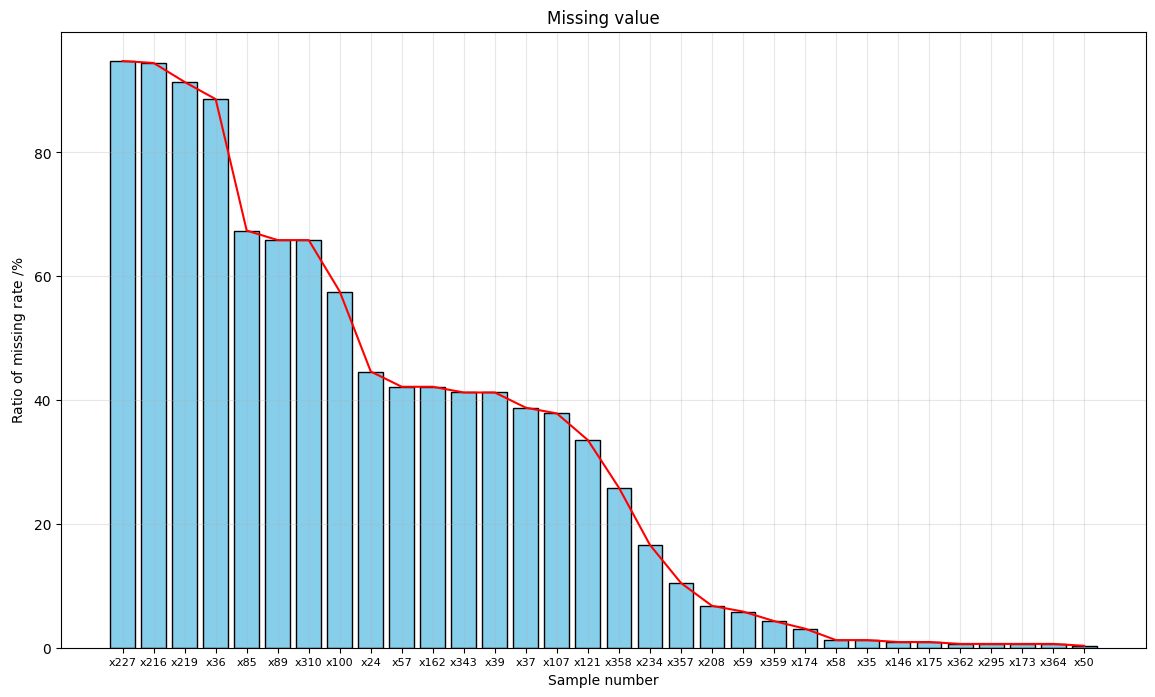

In [42]:
# 缺失值可视化
plt.figure(figsize=(14,8))
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.size']=10
len_x = np.arange(32)
plt.grid(alpha=0.3)
plt.style.use('default')
plt.bar(len_x,missing_data['Missing Ratio'],color='skyblue',edgecolor='k',width=0.8)
plt.plot(np.arange(32),missing_data.values,color='r')
plt.ylabel("Ratio of missing rate /$\%$")
plt.xlabel("Sample number")
plt.xticks(len_x,('x227', 'x216', 'x219', 'x36', 'x85', 'x89', 'x310', 'x100', 'x24',
       'x57', 'x162', 'x343', 'x39', 'x37', 'x107', 'x121', 'x358', 'x234',
       'x357', 'x208', 'x59', 'x359', 'x174', 'x58', 'x35', 'x146', 'x175',
       'x362', 'x295', 'x173', 'x364', 'x50'),fontsize=8)
plt.title("Missing value")
plt.savefig('Missing value.jpeg',bbox_inches='tight',dpi=600)

Text(0.5, 0, 'Features')

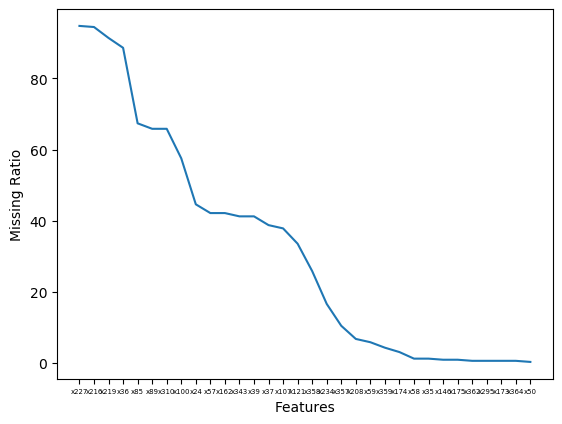

In [104]:
plt.plot(np.arange(32),missing_data.values)
plt.ylabel('Missing Ratio')
plt.xticks(len_x,('x227', 'x216', 'x219', 'x36', 'x85', 'x89', 'x310', 'x100', 'x24',
       'x57', 'x162', 'x343', 'x39', 'x37', 'x107', 'x121', 'x358', 'x234',
       'x357', 'x208', 'x59', 'x359', 'x174', 'x58', 'x35', 'x146', 'x175',
       'x362', 'x295', 'x173', 'x364', 'x50'),fontsize=5)
plt.xlabel('Features')

#### 3.3 缺失值删除与填充
* 如果缺失值个数大于100即删除

In [107]:
df3.isnull().sum().sort_values(ascending=False)[:32]
# 查找大于100个缺失值的列

x227    308
x216    307
x219    297
x36     288
x85     219
x89     214
x310    214
x100    187
x24     145
x57     137
x162    137
x343    134
x39     134
x37     126
x107    123
x121    109
x358     84
x234     54
x357     34
x208     22
x59      19
x359     14
x174     10
x35       4
x58       4
x146      3
x175      3
x295      2
x173      2
x364      2
x362      2
x50       1
dtype: int64

In [7]:
df4 = df3.drop(['x227', 'x216', 'x219', 'x36', 'x85', 'x89', 'x310', 'x100', 'x24',
       'x57', 'x162', 'x343', 'x39', 'x37', 'x107', 'x121'],axis=1)

In [10]:
df3.shape

(325, 367)

In [11]:
df4.shape

(325, 351)

In [8]:
index_ = df4.isnull().sum().sort_values(ascending=False)[:16].index

In [9]:
m = []
for ind in index_:
    m.append(df4[ind].mean())

In [10]:
# 缺失值填充，用平均值填充
values = {'x358':m[0], 'x234':m[1], 'x357':m[2], 'x208':m[3], 'x59':m[4], 'x359':m[5], 'x174':m[6], 'x58':m[7], 'x35':m[8],
       'x146':m[9], 'x175':m[10], 'x295':m[11], 'x362':m[12], 'x364':m[13], 'x173':m[14], 'x50':m[15]}
df5 = df4.fillna(value=values)

In [11]:
df5.isnull().any().value_counts()  # 到此为止，缺失值并填充完毕

False    351
dtype: int64

#### 3.4 归一化
* 使用minmax(0,1),貌似效果不太好，因为出来了许多0，1
* 所以，我们可以采用规范化

In [13]:
df5

,y_ron,y_sul,x1,x2,x3,x4,x5,x6,x7,x8,...,x356,x357,x358,x359,x360,x361,x362,x363,x364,x365
0,89.22,3.2,188.000000,90.6,53.230000,24.400000,22.370000,61.487143,726.085714,2.32,...,2.045436,6368.74700,233.310805,83086802.00,832503.795,2.216409e+03,39063124.50,1840.14470,39608757.0,0.353271
1,89.32,3.2,169.000000,90.5,52.300000,26.400000,21.300000,61.880000,731.300000,2.37,...,2.025974,6360.64530,242.369205,82318954.00,803462.665,2.370587e+03,38810581.50,1641.73260,39389299.0,0.354504
2,89.32,3.2,177.000000,90.7,52.300000,26.314286,21.385714,61.722857,729.614286,2.43,...,1.964696,6504.96490,233.076925,82012004.00,791925.055,2.326465e+03,38693812.00,1600.67575,39312616.5,0.350181
3,89.02,3.2,159.000000,90.4,52.300000,26.100000,21.600000,61.330000,725.400000,3.08,...,2.039041,6506.82495,238.349935,81231373.50,762863.810,2.495224e+03,38410862.50,1563.71215,39120204.5,0.353930
4,88.32,3.2,173.000000,89.6,52.242857,26.671429,21.085714,61.332857,725.428571,2.45,...,1.986900,6560.24225,236.576220,80915707.50,751362.300,2.807789e+03,38283000.00,1554.35740,39045953.5,0.358053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,88.05,3.2,271.428571,89.2,47.190000,31.300000,21.510000,52.020000,725.200000,9.45,...,3.454565,8328.97475,150.441617,84087479.25,2136687.475,3.159956e+06,1569503.75,-7028.11670,1003276.5,-118.251152
321,87.95,3.2,271.428571,89.2,47.190000,31.300000,21.510000,52.020000,725.200000,9.09,...,2.752566,8457.86080,148.748365,83687113.25,2129270.425,3.662122e+06,1521263.75,-8555.30420,879436.8,-118.764337
322,88.05,3.2,271.428571,89.4,47.190000,31.300000,21.510000,52.020000,725.200000,5.72,...,2.935758,8246.20925,150.095445,83087625.75,2118469.700,4.415371e+06,1448903.75,-10846.08550,693676.8,-119.534108
323,88.12,3.6,266.000000,89.4,46.720000,33.780000,19.500000,45.450000,730.000000,4.33,...,3.174031,7998.80235,149.533987,82696129.75,2110959.450,4.917538e+06,1400663.75,-12373.27275,569836.8,-120.047287


In [14]:
cols = df5.columns

In [12]:
data_st = normalize(df5,axis=0)


In [16]:
pd.DataFrame(data_st,columns=cols).to_csv('clean_data.csv',index=None)

In [46]:
dataset = data_st[:,2:]
y_ron_norm = data_st[:,0]
y_sul_norm = data_st[:,1]

#### 3.5 kernelPCA降维

In [29]:
KernelPCA?

In [11]:
x_s.shape

(325, 349)

In [10]:
def Kernel_Pca(ker,x):
    kpca = KernelPCA(n_components=20, kernel=ker, gamma=15)
#     x_kpca = kpca.fit_transform(x)
    kpca_transform = kpca.fit_transform(x)
    explained_variance = np.var(kpca_transform, axis=0)
    ev = explained_variance / np.sum(explained_variance)
    

    #--------- Bar Graph for Explained Variance Ratio ------------
    plt.bar(np.arange(20),list(ev*100),label='Principal Components',color='b')
    plt.legend()
    plt.xlabel('Principal Components ')
    #----------------------
#     n=list(ev*100)
#     pc=[]
#     for i in range(len(n)):
#             n[i]=round(n[i],4)
#             pc.append('PC-'+str(i+1)+'('+str(n[i])+')')

#     #----------------------
#     plt.xticks([1,2,3,4],pc, fontsize=7, rotation=30)
    plt.ylabel('Variance Ratio')
    plt.title('Variance Ratio of IRIS Dataset using kernel:'+str(ker))
    plt.show()
    #---------------------------------------------------
    # *Since the initial 2 principal components have high variance.
    #   so, we select pc-1 and pc-2.
    #---------------------------------------------------
#     kpca = KernelPCA(n_components=2, kernel=ker, gamma=15)
#     x_kpca = kpca.fit_transform(x)
#     principalComponents = kpca.fit_transform(x)

#     principalDf = pd.DataFrame(data = principalComponents
#                  , columns = ['PC-1', 'PC-2'])
#     # Adding lables
#     finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
#     # Plotting pc1 & pc2
#     fig = plt.figure(figsize = (8,8))
#     ax = fig.add_subplot(1,1,1) 
#     ax.set_xlabel('PC-1', fontsize = 15)
#     ax.set_ylabel('PC-2', fontsize = 15)
#     ax.set_title('KPCA on IRIS Dataset using kernel:'+str(ker), fontsize = 20)
#     targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
#     colors = ['r', 'g', 'b']
#     for target, color in zip(targets,colors):
#         indicesToKeep = finalDf['target'] == target
#         ax.scatter(finalDf.loc[indicesToKeep, 'PC-1']
#                    , finalDf.loc[indicesToKeep, 'PC-2']
#                    , c = color
#                    , s = 30)
#     ax.legend(targets)
#     ax.grid()
#     plt.show() # FOR SHOWING THE PLOT
#     #------------------- SAVING DATA INTO CSV FILE ------------
#     finalDf.to_csv('iris_after_KPCA_using_'+str(ker)+'.csv')
#     return kpca_transform,ev

# #------------------------------------------------------
# k=['linear','rbf','poly']
# for i in k:
#     Kernel_Pca(i,dataset)
Kernel_Pca(ker='rbf',x=x_s)

LinAlgError: unrecoverable internal error.

# 1.多项式核，degree=3

In [74]:
x_pca_poly = KernelPCA(n_components=20,random_state=10,kernel='poly',degree=3).fit_transform(dataset)
# 方差
explained_variance_poly = np.var(x_pca_poly, axis=0)
# 方差百分比
sum=0
for i in range(len(explained_variance_poly)):
    e = round(explained_variance_poly[i]/np.sum(explained_variance_poly)*100)
    sum+=e
    print(f'第{i+1}个主成分的方差百分比是：{e}%,---------第{i+1}个主成分的累计方差贡献率是：{sum}%')

第1个主成分的方差百分比是：46.0%,---------第1个主成分的累计方差贡献率是：46.0%
第2个主成分的方差百分比是：15.0%,---------第2个主成分的累计方差贡献率是：61.0%
第3个主成分的方差百分比是：8.0%,---------第3个主成分的累计方差贡献率是：69.0%
第4个主成分的方差百分比是：6.0%,---------第4个主成分的累计方差贡献率是：75.0%
第5个主成分的方差百分比是：4.0%,---------第5个主成分的累计方差贡献率是：79.0%
第6个主成分的方差百分比是：3.0%,---------第6个主成分的累计方差贡献率是：82.0%
第7个主成分的方差百分比是：2.0%,---------第7个主成分的累计方差贡献率是：84.0%
第8个主成分的方差百分比是：2.0%,---------第8个主成分的累计方差贡献率是：86.0%
第9个主成分的方差百分比是：2.0%,---------第9个主成分的累计方差贡献率是：88.0%
第10个主成分的方差百分比是：2.0%,---------第10个主成分的累计方差贡献率是：90.0%
第11个主成分的方差百分比是：2.0%,---------第11个主成分的累计方差贡献率是：92.0%
第12个主成分的方差百分比是：1.0%,---------第12个主成分的累计方差贡献率是：93.0%
第13个主成分的方差百分比是：1.0%,---------第13个主成分的累计方差贡献率是：94.0%
第14个主成分的方差百分比是：1.0%,---------第14个主成分的累计方差贡献率是：95.0%
第15个主成分的方差百分比是：1.0%,---------第15个主成分的累计方差贡献率是：96.0%
第16个主成分的方差百分比是：1.0%,---------第16个主成分的累计方差贡献率是：97.0%
第17个主成分的方差百分比是：1.0%,---------第17个主成分的累计方差贡献率是：98.0%
第18个主成分的方差百分比是：1.0%,---------第18个主成分的累计方差贡献率是：99.0%
第19个主成分的方差百分比是：1.0%,---------第19个主成分的累计方差贡献率是：100.0%
第20个主成分的方差百分比是：1.0%,-------

# 2.径向基核,gamma=10

In [72]:
x_pca_rbf = KernelPCA(n_components=20,random_state=10,kernel='rbf',gamma=10).fit_transform(dataset)
# 方差
explained_variance_rbf = np.var(x_pca_rbf, axis=0)
# 方差百分比
sum = 0
for i in range(len(explained_variance_rbf)):
    e = round(explained_variance_rbf[i]/np.sum(explained_variance_rbf)*100)
    sum+=e
    print(f'第{i+1}个主成分的方差百分比是：{e}%,---------第{i+1}个主成分的累计方差贡献率是：{sum}%')

第1个主成分的方差百分比是：24.0%,---------第1个主成分的累计方差贡献率是：24.0%
第2个主成分的方差百分比是：11.0%,---------第2个主成分的累计方差贡献率是：35.0%
第3个主成分的方差百分比是：9.0%,---------第3个主成分的累计方差贡献率是：44.0%
第4个主成分的方差百分比是：9.0%,---------第4个主成分的累计方差贡献率是：53.0%
第5个主成分的方差百分比是：7.0%,---------第5个主成分的累计方差贡献率是：60.0%
第6个主成分的方差百分比是：5.0%,---------第6个主成分的累计方差贡献率是：65.0%
第7个主成分的方差百分比是：5.0%,---------第7个主成分的累计方差贡献率是：70.0%
第8个主成分的方差百分比是：4.0%,---------第8个主成分的累计方差贡献率是：74.0%
第9个主成分的方差百分比是：3.0%,---------第9个主成分的累计方差贡献率是：77.0%
第10个主成分的方差百分比是：3.0%,---------第10个主成分的累计方差贡献率是：80.0%
第11个主成分的方差百分比是：3.0%,---------第11个主成分的累计方差贡献率是：83.0%
第12个主成分的方差百分比是：3.0%,---------第12个主成分的累计方差贡献率是：86.0%
第13个主成分的方差百分比是：3.0%,---------第13个主成分的累计方差贡献率是：89.0%
第14个主成分的方差百分比是：2.0%,---------第14个主成分的累计方差贡献率是：91.0%
第15个主成分的方差百分比是：2.0%,---------第15个主成分的累计方差贡献率是：93.0%
第16个主成分的方差百分比是：2.0%,---------第16个主成分的累计方差贡献率是：95.0%
第17个主成分的方差百分比是：2.0%,---------第17个主成分的累计方差贡献率是：97.0%
第18个主成分的方差百分比是：1.0%,---------第18个主成分的累计方差贡献率是：98.0%
第19个主成分的方差百分比是：1.0%,---------第19个主成分的累计方差贡献率是：99.0%
第20个主成分的方差百分比是：1.0%,--------

In [75]:
x_pca_poly_df = pd.DataFrame(data=x_pca_poly,columns=['x_pca_0','x_pca_1','x_pca_2','x_pca_3','x_pca_4','x_pca_5','x_pca_6','x_pca_7','x_pca_8','x_pca_9',
                                 'x_pca_10','x_pca_11','x_pca_12','x_pca_13','x_pca_14','x_pca_15','x_pca_16','x_pca_17','x_pca_18','x_pca_19'
])

In [77]:
data_pca = pd.concat([x_pca_poly_df,pd.Series(y_ron)],axis=1)

In [78]:
data_pca

,x_pca_0,x_pca_1,x_pca_2,x_pca_3,x_pca_4,x_pca_5,x_pca_6,x_pca_7,x_pca_8,x_pca_9,...,x_pca_11,x_pca_12,x_pca_13,x_pca_14,x_pca_15,x_pca_16,x_pca_17,x_pca_18,x_pca_19,0
0,-0.022914,-0.003111,0.009689,-0.008894,-0.006806,0.008478,0.002832,-0.005416,0.002148,-0.001261,...,-0.006136,0.000653,0.003260,0.002080,0.004884,0.004896,-0.002561,0.000470,0.001014,0.055951
1,-0.022213,-0.002885,0.007871,-0.010030,-0.008888,0.007660,0.004110,-0.004688,0.003599,-0.001591,...,-0.005924,-0.000350,0.001783,0.004381,0.005926,0.003453,-0.002475,0.000218,-0.001482,0.056014
2,-0.021957,-0.003593,0.009108,-0.008174,-0.007540,0.007330,0.004536,-0.004210,0.002395,-0.000957,...,-0.005436,-0.001049,0.002118,0.003564,0.004947,0.003664,-0.002505,-0.000179,-0.000233,0.056014
3,-0.022352,-0.004087,0.009465,-0.008154,-0.007022,0.007726,0.003414,-0.005510,0.001373,-0.001156,...,-0.006418,-0.001144,0.003206,0.004543,0.005052,0.002409,-0.002796,-0.001491,-0.000581,0.055826
4,-0.022331,-0.002321,0.007243,-0.008044,-0.005656,0.006607,0.004185,-0.003504,0.002809,-0.001595,...,-0.004713,0.000018,0.005227,0.004496,0.002841,0.003925,-0.003870,-0.002295,-0.002667,0.055387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,0.046900,0.067240,0.033623,0.014187,-0.000375,-0.001225,0.000268,0.003641,-0.001245,-0.000697,...,0.000514,-0.002284,-0.003251,0.000715,0.002548,0.002285,-0.001391,0.001934,0.001926,0.055218
321,0.045203,0.067824,0.035308,0.016348,-0.001762,-0.002493,0.001501,0.001450,-0.001974,-0.001799,...,-0.002298,0.002486,-0.004641,-0.000133,-0.000259,-0.002096,-0.002614,-0.001549,0.000013,0.055155
322,0.046436,0.071208,0.037900,0.013314,-0.001659,-0.004511,0.001638,-0.005893,0.000576,0.003080,...,-0.000879,0.001596,0.000732,-0.003805,-0.005836,-0.004173,-0.005065,0.002671,-0.006817,0.055218
323,0.047702,0.072525,0.038830,0.013272,-0.001636,-0.004174,0.001392,-0.005079,-0.001409,0.002910,...,-0.002804,0.000915,-0.000507,-0.004023,-0.006708,-0.003373,-0.007224,0.003266,-0.009630,0.055262


### 4 预测
* 线性SVR
* 多项式SVR
* 高斯SVR
* PCA-SVR
* KernelPCA-SVR

#### 4.1线性SVR

In [27]:
x_train,x_test,y_train,y_test = train_test_split(dataset,y_ron,test_size=0.3,random_state=10)
# 建模
model = SVR(C=10,gamma=0.01,kernel='linear',epsilon=0.0001,)
# 预测
y_pred = model.fit(x_train,y_train).predict(x_test)
# R2
R2 = model.score(x_test,y_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f'R2:{R2}, 均方误差:{mse},绝对误差:{mae}')

R2:0.5761566896984777, 均方误差:0.3700368345519176,绝对误差:0.44725346022033413


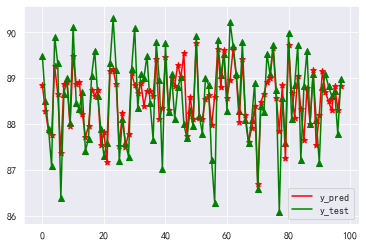

In [25]:
# 可视化
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(range(len(y_pred)),y_pred,c='r',marker='*')
ax.scatter(range(len(y_pred)),y_test,c='g',marker='^')
ax.plot(range(len(y_pred)),y_pred,c='r',label='y_pred')
ax.plot(range(len(y_pred)),y_test,c='g',label='y_test')
plt.legend()
plt.show()

* 线性SVR拟合效果较好，R2有0.576，但是均方误差与绝对误差很小。

#### 4.2 多项式SVR

R2:0.5790613980862496, 均方误差:0.3675008759299852,绝对误差:0.4407297299349092


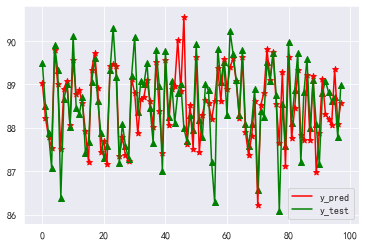

In [42]:
x_train,x_test,y_train,y_test = train_test_split(dataset,y_ron,test_size=0.3,random_state=10)
# 建模
model = SVR(C=10,kernel='poly',epsilon=0.0001,degree=2)
# 预测
y_pred = model.fit(x_train,y_train).predict(x_test)
# R2
R2 = model.score(x_test,y_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f'R2:{R2}, 均方误差:{mse},绝对误差:{mae}')

# 可视化
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(range(len(y_pred)),y_pred,c='r',marker='*')
ax.scatter(range(len(y_pred)),y_test,c='g',marker='^')
ax.plot(range(len(y_pred)),y_pred,c='r',label='y_pred')
ax.plot(range(len(y_pred)),y_test,c='g',label='y_test')
plt.legend()
plt.show()

* 可以看到多项式核的degree=2，R2=0.579，均方误差与绝对误差相对于线性SVR都小一些

#### 4.3 高斯SVR

R2:0.6331362711138158, 均方误差:0.3202907528548267,绝对误差:0.41900220732829546


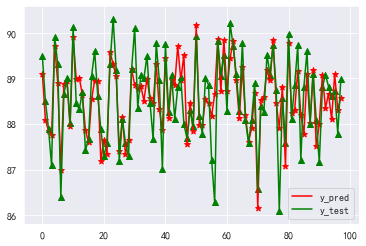

In [137]:
x_train,x_test,y_train,y_test = train_test_split(dataset,y_ron,test_size=0.3,random_state=10)
# 建模
model = SVR(C=2000,kernel='rbf',epsilon=0.0001,gamma=0.01)
# 预测
y_pred = model.fit(x_train,y_train).predict(x_test)
# R2
R2 = model.score(x_test,y_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f'R2:{R2}, 均方误差:{mse},绝对误差:{mae}')

# 可视化
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(range(len(y_pred)),y_pred,c='r',marker='*')
ax.scatter(range(len(y_pred)),y_test,c='g',marker='^')
ax.plot(range(len(y_pred)),y_pred,c='r',label='y_pred')
ax.plot(range(len(y_pred)),y_test,c='g',label='y_test')
plt.legend()
plt.show()

* 可以看到高斯核的拟合效果更好一些，预测效果同样很好

#### 4.4 PCA-SVR

#### 4.4.1 降到20维时的PCA-SVR(poly)

R2:0.61369446958099, 均方误差:0.3372644375216332,绝对误差:0.454204055260966


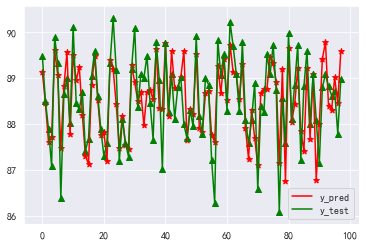

In [92]:
x_pca_linear = KernelPCA(n_components=20,random_state=10,kernel='linear').fit_transform(dataset)
x_train,x_test,y_train,y_test = train_test_split(x_pca_linear,y_ron,test_size=0.3,random_state=10)
# 建模
model = SVR(C=10,kernel='poly',epsilon=0.0001,degree=3)
# 预测
y_pred = model.fit(x_train,y_train).predict(x_test)
# R2
R2 = model.score(x_test,y_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f'R2:{R2}, 均方误差:{mse},绝对误差:{mae}')

# 可视化
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(range(len(y_pred)),y_pred,c='r',marker='*')
ax.scatter(range(len(y_pred)),y_test,c='g',marker='^')
ax.plot(range(len(y_pred)),y_pred,c='r',label='y_pred')
ax.plot(range(len(y_pred)),y_test,c='g',label='y_test')
plt.legend()
plt.show()

* 可以看到PCA-SVR的拟合效果只有0.6137,效果比未降维前的线性SVR较好

#### 4.4.2 降到20维时的PCA-SVR(rbf)

R2:0.5209218220202636, 均方误差:0.41825969214049225,绝对误差:0.46893968551607934


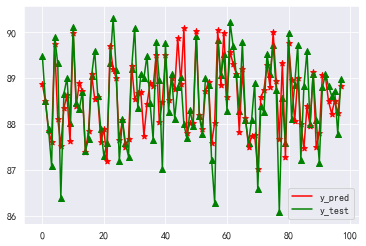

In [98]:
x_pca_linear = KernelPCA(n_components=20,random_state=10,kernel='linear').fit_transform(dataset)
x_train,x_test,y_train,y_test = train_test_split(x_pca_linear,y_ron,test_size=0.3,random_state=10)
# 建模
model = SVR(C=10000,kernel='rbf',epsilon=0.0001,gamma=0.01)
# 预测
y_pred = model.fit(x_train,y_train).predict(x_test)
# R2
R2 = model.score(x_test,y_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f'R2:{R2}, 均方误差:{mse},绝对误差:{mae}')

# 可视化
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(range(len(y_pred)),y_pred,c='r',marker='*')
ax.scatter(range(len(y_pred)),y_test,c='g',marker='^')
ax.plot(range(len(y_pred)),y_pred,c='r',label='y_pred')
ax.plot(range(len(y_pred)),y_test,c='g',label='y_test')
plt.legend()
plt.show()

* 效果并没有多项式核SVR好

#### 4.4.3 降到10维时的PCA-SVR(poly)

R2:0.47254610489210513, 均方误差:0.4604941613422076,绝对误差:0.5211011556477786


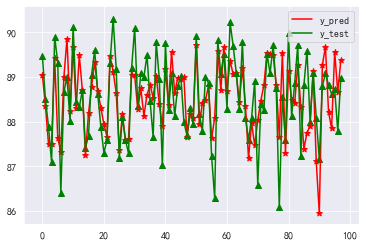

In [100]:
x_pca_linear = KernelPCA(n_components=10,random_state=10,kernel='linear').fit_transform(dataset)
x_train,x_test,y_train,y_test = train_test_split(x_pca_linear,y_ron,test_size=0.3,random_state=10)
# 建模
model = SVR(C=10,kernel='poly',epsilon=0.0001,degree=3)
# 预测
y_pred = model.fit(x_train,y_train).predict(x_test)
# R2
R2 = model.score(x_test,y_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f'R2:{R2}, 均方误差:{mse},绝对误差:{mae}')

# 可视化
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(range(len(y_pred)),y_pred,c='r',marker='*')
ax.scatter(range(len(y_pred)),y_test,c='g',marker='^')
ax.plot(range(len(y_pred)),y_pred,c='r',label='y_pred')
ax.plot(range(len(y_pred)),y_test,c='g',label='y_test')
plt.legend()
plt.show()

#### 4.4.4 降到10维时的PCA-SVR(rbf)

R2:0.5088793616658509, 均方误差:0.4287733744411371,绝对误差:0.48360686340896664


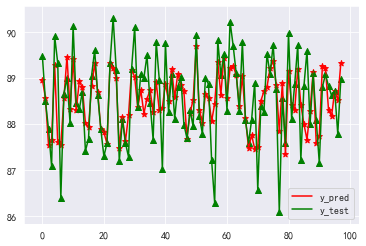

In [106]:
x_pca_linear = KernelPCA(n_components=10,random_state=10,kernel='linear').fit_transform(dataset)
x_train,x_test,y_train,y_test = train_test_split(x_pca_linear,y_ron,test_size=0.3,random_state=10)
# 建模
model = SVR(C=1000,kernel='rbf',epsilon=0.0001,gamma=0.1)
# 预测
y_pred = model.fit(x_train,y_train).predict(x_test)
# R2
R2 = model.score(x_test,y_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f'R2:{R2}, 均方误差:{mse},绝对误差:{mae}')

# 可视化
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(range(len(y_pred)),y_pred,c='r',marker='*')
ax.scatter(range(len(y_pred)),y_test,c='g',marker='^')
ax.plot(range(len(y_pred)),y_pred,c='r',label='y_pred')
ax.plot(range(len(y_pred)),y_test,c='g',label='y_test')
plt.legend()
plt.show()

* 综上，降到10维后效果普遍没有20维的结果好

#### 4.5 Kernel-PCA
* 多项式核
* 高斯径向基核

#### 4.5.1 降到20维时，rbf-PCA-SVR(poly)

R2:0.6138421349229681, 均方误差:0.3371355181441402,绝对误差:0.4538705748042458


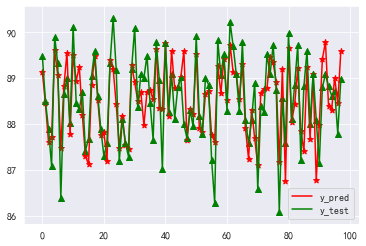

In [53]:
# 1.多项式核
x_pca_rbf = KernelPCA(n_components=20,random_state=10,kernel='rbf',gamma=0.01).fit_transform(dataset)
x_train,x_test,y_train,y_test = train_test_split(x_pca_rbf,y_ron,test_size=0.3,random_state=10)
# 建模
model = SVR(C=10,kernel='poly',epsilon=0.0001,degree=3)
# 预测
y_pred = model.fit(x_train,y_train).predict(x_test)
# R2
R2 = model.score(x_test,y_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f'R2:{R2}, 均方误差:{mse},绝对误差:{mae}')

# 可视化
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(range(len(y_pred)),y_pred,c='r',marker='*')
ax.scatter(range(len(y_pred)),y_test,c='g',marker='^')
ax.plot(range(len(y_pred)),y_pred,c='r',label='y_pred')
ax.plot(range(len(y_pred)),y_test,c='g',label='y_test')
plt.legend()
plt.show()

* 降到20维时，rbf-PCA-SVR(poly)拟合效果为0.614,效果与PCA-SVR(poly)类似

#### 4.5.2 降到20维时，rbf-PCA-SVR(rbf)

R2:0.564517934151606, 均方误差:0.38019806195839506,绝对误差:0.4342832177010285


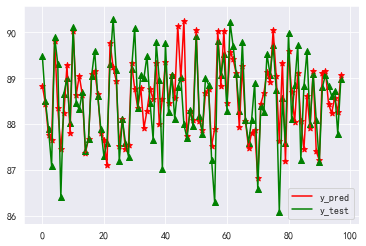

In [108]:
x_pca_rbf = KernelPCA(n_components=20,random_state=10,kernel='rbf',gamma=0.01).fit_transform(dataset)
x_train,x_test,y_train,y_test = train_test_split(x_pca_rbf,y_ron,test_size=0.3,random_state=10)
# 建模
model = SVR(C=10000,kernel='rbf',epsilon=0.0001,gamma=1.2)
# 预测
y_pred = model.fit(x_train,y_train).predict(x_test)
# R2
R2 = model.score(x_test,y_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f'R2:{R2}, 均方误差:{mse},绝对误差:{mae}')

# 可视化
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(range(len(y_pred)),y_pred,c='r',marker='*')
ax.scatter(range(len(y_pred)),y_test,c='g',marker='^')
ax.plot(range(len(y_pred)),y_pred,c='r',label='y_pred')
ax.plot(range(len(y_pred)),y_test,c='g',label='y_test')
plt.legend()
plt.show()

* rbf-PCA-SVR(rbf)拟合效果为0.5645，比PCA-SVR(rbf)效果好一些。

#### 4.5.3 降到10维时，rbf-PCA-SVR(poly)

R2:0.47786987140852505, 均方误差:0.4558462415526323,绝对误差:0.5182213699967085


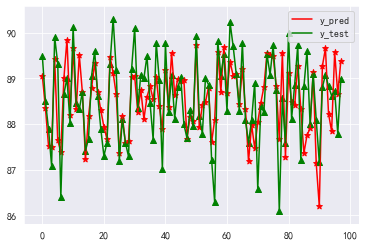

In [114]:
# 1.多项式核
x_pca_rbf = KernelPCA(n_components=10,random_state=10,kernel='rbf',gamma=0.01).fit_transform(dataset)
x_train,x_test,y_train,y_test = train_test_split(x_pca_rbf,y_ron,test_size=0.3,random_state=10)
# 建模
model = SVR(C=10,kernel='poly',epsilon=0.0001,degree=3)
# 预测
y_pred = model.fit(x_train,y_train).predict(x_test)
# R2
R2 = model.score(x_test,y_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f'R2:{R2}, 均方误差:{mse},绝对误差:{mae}')

# 可视化
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(range(len(y_pred)),y_pred,c='r',marker='*')
ax.scatter(range(len(y_pred)),y_test,c='g',marker='^')
ax.plot(range(len(y_pred)),y_pred,c='r',label='y_pred')
ax.plot(range(len(y_pred)),y_test,c='g',label='y_test')
plt.legend()
plt.show()

#### 4.5.4 降到10维时，rbf-PCA-SVR(rbf)

R2:0.5279179720271681, 均方误差:0.41215169623803566,绝对误差:0.4818371681209802


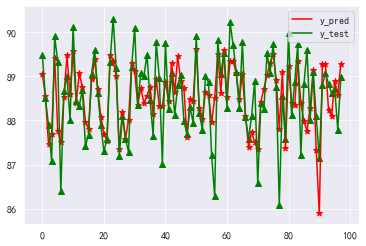

In [139]:
# 1.多项式核
x_pca_rbf = KernelPCA(n_components=10,random_state=10,kernel='rbf',gamma=0.01).fit_transform(dataset)
x_train,x_test,y_train,y_test = train_test_split(x_pca_rbf,y_ron,test_size=0.3,random_state=10)
# 建模
model = SVR(C=10000,kernel='rbf',epsilon=0.0001,gamma=2.5)
# 预测
y_pred = model.fit(x_train,y_train).predict(x_test)
# R2
R2 = model.score(x_test,y_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f'R2:{R2}, 均方误差:{mse},绝对误差:{mae}')

# 可视化
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(range(len(y_pred)),y_pred,c='r',marker='*')
ax.scatter(range(len(y_pred)),y_test,c='g',marker='^')
ax.plot(range(len(y_pred)),y_pred,c='r',label='y_pred')
ax.plot(range(len(y_pred)),y_test,c='g',label='y_test')
plt.legend()
plt.show()

* 同样，降到20维的效果比10维的效果好一些